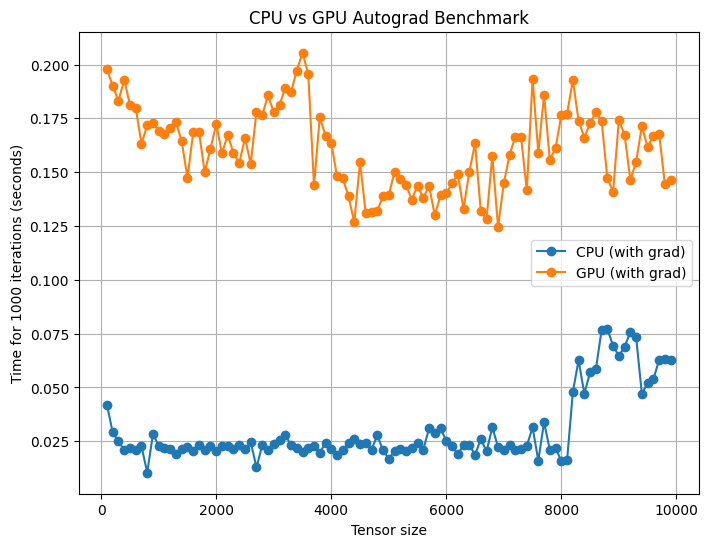

In [1]:
import torch, time
import matplotlib.pyplot as plt

# Sizes to test
sizes = [i for i in range(100, 10000, 100)]
iterations = 1000

cpu_times = []
gpu_times = []

for size in sizes:
    # CPU benchmark
    x = torch.randn(size, device="cpu", requires_grad=True)
    start = time.time()
    for _ in range(iterations):
        y = x @ x
        yy = y.backward(retain_graph=True)
    cpu_times.append(time.time() - start)

    # GPU benchmark
    if torch.cuda.is_available():
        x_gpu = torch.randn(size, device="cuda", requires_grad=True)
        start = time.time()
        for _ in range(iterations):
            y_gpu = x_gpu @ x_gpu
            yy_gpu = y_gpu.backward(retain_graph=True)
        torch.cuda.synchronize()
        gpu_times.append(time.time() - start)
    else:
        gpu_times.append(float('nan'))  # placeholder if no GPU

# Plot results
plt.figure(figsize=(8,6))
plt.plot(sizes, cpu_times, label="CPU (with grad)", marker="o")
plt.plot(sizes, gpu_times, label="GPU (with grad)", marker="o")
plt.xlabel("Tensor size")
plt.ylabel(f"Time for {iterations} iterations (seconds)")
plt.title("CPU vs GPU Autograd Benchmark")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import torch
import matplotlib.pyplot as plt

# 1. Define your custom probability distribution for 100 intervals between 0 and 1.
# These weights must be non-negative and don't need to sum to 1.
# For this example, we'll create a distribution that samples more points near 0 and 1.
x_intervals = torch.linspace(0, 1, 100)
# A simple quadratic function to define weights
weights = (x_intervals - 0.5)**4 
weights = weights / weights.sum() # Normalize to see it as a probability distribution

# 2. Sample 100 interval indices based on the defined weights.
# replacement=True allows intervals to be chosen more than once, according to the weights.
sampled_interval_indices = torch.multinomial(weights, num_samples=100, replacement=True)

# 3. Generate a random point within each chosen interval.
# The width of each interval is 1.0 / 100 = 0.01
interval_width = 1.0 / 100
# Generate random offsets within an interval
random_offsets = torch.rand(100) * interval_width
# Calculate the final sampled points
sampled_points = sampled_interval_indices.float() * interval_width + random_offsets

# Sort the points for easier visualization
sampled_points_sorted = torch.sort(sampled_points).values

print("Generated Tensor:")
print(sampled_points_sorted)

# --- Visualization ---
plt.figure(figsize=(12, 6))

# Plot the probability distribution
plt.subplot(1, 2, 1)
plt.bar(x_intervals.numpy(), weights.numpy(), width=0.01, align='edge', label='Probability per Interval')
plt.title('Custom Probability Distribution')
plt.xlabel('Interval Start')
plt.ylabel('Probability')
plt.legend()

# Plot the generated points
plt.subplot(1, 2, 2)
plt.eventplot(sampled_points_sorted.unsqueeze(0), orientation='horizontal', colors='b')
plt.title('100 Sampled Points from [0, 1]')
plt.xlabel('Value')
plt.yticks([])
plt.xlim(0, 1)

plt.tight_layout()
plt.show()